### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from itertools import repeat
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam

C:\Users\kvenu\AppData\Local\Temp\ipykernel_18484\572016770.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
warnings.filterwarnings('ignore')

### Data Preprocessing and Feature Engineering

In [3]:
print("Loading Datasets")
trainingDataset = pd.read_csv("./train.csv")
testingDataset = pd.read_csv("./test.csv")

Loading Datasets


In [4]:
print("Sample rows from dataset")
display(trainingDataset.head())

Sample rows from dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print("Descriptive analysis of dataset")
display(trainingDataset.describe())

Descriptive analysis of dataset


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Correlation graph of dataset


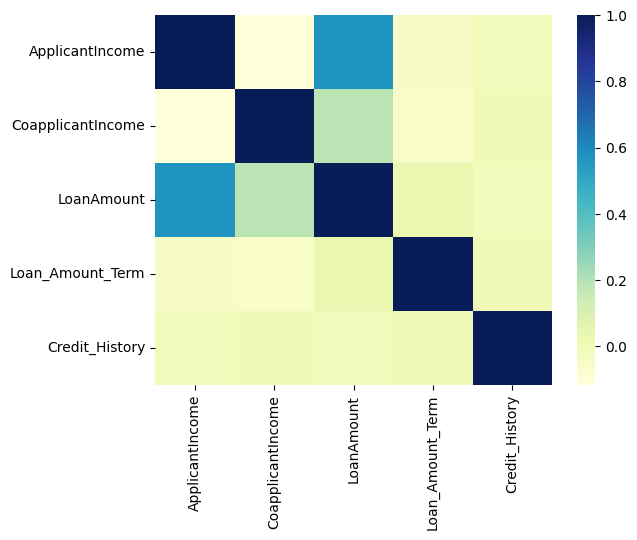

In [6]:
print("Correlation graph of dataset")
correlation=trainingDataset.corr(numeric_only=True)
sns.heatmap(correlation,  cmap="YlGnBu")
plt.show()

In [7]:
print("Checking for null value")
trainingDataset.isnull().sum()

Checking for null value


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
print("Fixing null values for both the datasets")
def fillNa(dataset):
    dataset['Gender'].fillna("Male",inplace=True)
    dataset['Married'].fillna("yes",inplace=True)
    dataset['Dependents'].fillna(0,inplace=True)
    dataset['Self_Employed'].fillna('no',inplace=True)
    dataset['LoanAmount'].fillna(0,inplace=True)
    dataset['Loan_Amount_Term'].fillna(0,inplace=True)
    dataset['Credit_History'].fillna(0,inplace=True)
    return dataset

trainingDataset = fillNa(trainingDataset)
testingDataset = fillNa(testingDataset)

display(trainingDataset.isnull().sum())

Fixing null values for both the datasets


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

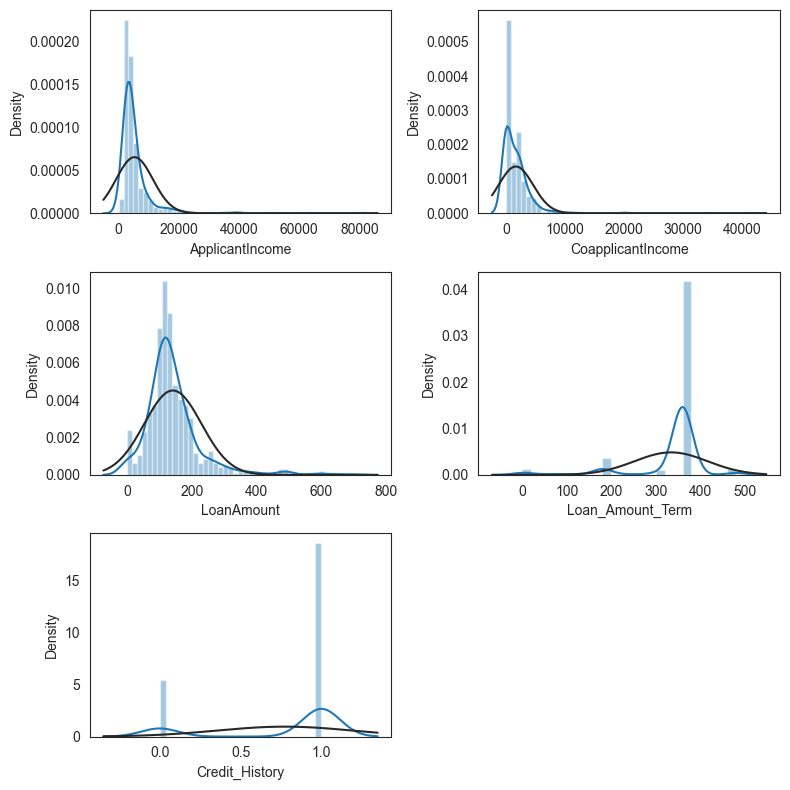

In [9]:
# univariant analysis
plt.figure(figsize=(8,8))
for i, col in enumerate(trainingDataset.dtypes[trainingDataset.dtypes != 'object'].index):
    sns.set_style('white')
    i += 1
    plt.subplot(int(str(32)+str(i)))
    sns.distplot(trainingDataset[col], fit = norm)
plt.tight_layout()
plt.show()

In [10]:
def chi_sq(col, df):
    for i in df.dtypes[df.dtypes == 'object'].index:
        if i != col:
            chisqResult = chi2_contingency(pd.crosstab(index = df[i], columns = df[col]))
            print(f"p - value between {col} and {i} is:", round(chisqResult[1],3))
            if chisqResult[1] > 0.05:
                print(f"{col} and {i} are not correlated")
            print()

In [11]:
print("performing chi-square test between loan status and other attributes")
chi_sq('LoanAmount', trainingDataset)

performing chi-square test between loan status and other attributes
p - value between LoanAmount and Loan_ID is: 0.342
LoanAmount and Loan_ID are not correlated

p - value between LoanAmount and Gender is: 0.49
LoanAmount and Gender are not correlated

p - value between LoanAmount and Married is: 1.0
LoanAmount and Married are not correlated

p - value between LoanAmount and Dependents is: 0.85
LoanAmount and Dependents are not correlated

p - value between LoanAmount and Education is: 0.935
LoanAmount and Education are not correlated

p - value between LoanAmount and Self_Employed is: 0.619
LoanAmount and Self_Employed are not correlated

p - value between LoanAmount and Property_Area is: 0.278
LoanAmount and Property_Area are not correlated

p - value between LoanAmount and Loan_Status is: 0.437
LoanAmount and Loan_Status are not correlated



In [12]:
print("Drop unnecessary columns")
cols = ['Loan_Amount_Term', 'Loan_ID']
trainingDataset.drop(columns = cols , axis = 1, inplace=True)
testingDataset.drop(columns = cols , axis = 1, inplace=True)

Drop unnecessary columns


In [13]:
print("Bi-variant analysis")
def cross_tab(col, df):
    for i in df.dtypes[df.dtypes == 'object'].index:
        if i != col:
            print(pd.crosstab(index = df[i], columns = df[col], normalize='index'))
            print()
cross_tab('Loan_Status', trainingDataset)

Bi-variant analysis
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080
yes          0.000000  1.000000

Loan_Status         N         Y
Dependents                     
0            0.400000  0.600000
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927
no             0.281250  0.718750

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  

In [14]:
testingDataset['Dependents'].replace('3+','0',inplace=True)
trainingDataset['Dependents'].replace('3+','0',inplace=True)

In [15]:
trainingDataset['Dependents'] = trainingDataset['Dependents'].apply(lambda x : str(x))
testingDataset['Dependents'] = testingDataset['Dependents'].apply(lambda x : str(x))

In [16]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    trainingDataset[col] = le.fit_transform(trainingDataset[col])
    if col in testingDataset:
        testingDataset[col] = le.transform(testingDataset[col])

In [17]:
# Feature Engineering
trainingDataset['Total_Income'] = trainingDataset['ApplicantIncome'] + trainingDataset['CoapplicantIncome']
trainingDataset['Loan_Income_Ratio'] = trainingDataset['LoanAmount'] / trainingDataset['Total_Income']

In [18]:
# Feature Engineering
testingDataset['Total_Income'] = testingDataset['ApplicantIncome'] + testingDataset['CoapplicantIncome']
testingDataset['Loan_Income_Ratio'] = testingDataset['LoanAmount'] / testingDataset['Total_Income']

In [19]:
print("Segregating inputs and outputs")

X = trainingDataset.drop(['Loan_Status'], axis=1)
y = trainingDataset['Loan_Status']

Segregating inputs and outputs


In [20]:
print("Sample from input and output")
display(X.head())

Sample from input and output


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Total_Income,Loan_Income_Ratio
0,1,0,0,0,0,5849,0.0,0.0,1.0,2,5849.0,0.000000
1,1,1,1,0,0,4583,1508.0,128.0,1.0,0,6091.0,0.021015
2,1,1,0,0,1,3000,0.0,66.0,1.0,2,3000.0,0.022000
3,1,1,0,1,0,2583,2358.0,120.0,1.0,2,4941.0,0.024287
4,1,0,0,0,0,6000,0.0,141.0,1.0,2,6000.0,0.023500


In [21]:
display(y.head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###  Model Training with Multiple Algorithms

In [29]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest AUC:", roc_auc_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred))

Random Forest Accuracy: 0.8064516129032258
Random Forest AUC: 0.7491289198606271
Random Forest F1 Score: 0.8636363636363636


In [31]:
# Model 2: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost AUC:", roc_auc_score(y_test, xgb_pred))
print("XGBoost F1 Score:", f1_score(y_test, xgb_pred))

XGBoost Accuracy: 0.7419354838709677
XGBoost AUC: 0.6771196283391405
XGBoost F1 Score: 0.8181818181818182


In [32]:
# Model 3: Neural Network with GRU
X_train_nn = np.expand_dims(X_train, axis=1)
X_test_nn = np.expand_dims(X_test, axis=1)

gru_model = Sequential([
    GRU(32, input_shape=(X_train_nn.shape[1], X_train_nn.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train_nn, y_train, epochs=10, batch_size=32, validation_data=(X_test_nn, y_test))
gru_pred = (gru_model.predict(X_test_nn) > 0.5).astype("int32")
print("GRU Accuracy:", accuracy_score(y_test, gru_pred))
print("GRU AUC:", roc_auc_score(y_test, gru_pred))
print("GRU F1 Score:", f1_score(y_test, gru_pred))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.6457 - loss: 0.6776 - val_accuracy: 0.7419 - val_loss: 0.6567
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7524 - loss: 0.6455 - val_accuracy: 0.7258 - val_loss: 0.6259
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7674 - loss: 0.6049 - val_accuracy: 0.7097 - val_loss: 0.5954
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7391 - loss: 0.5876 - val_accuracy: 0.7258 - val_loss: 0.5714
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7756 - loss: 0.5427 - val_accuracy: 0.7258 - val_loss: 0.5549
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7569 - loss: 0.5423 - val_accuracy: 0.7258 - val_loss: 0.5461
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7560 - loss: 0.5217 - val_accuracy: 0.7258 - val_loss: 0.5421
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7622 - loss: 0.5188 - val_accuracy: 0.7258 -

In [33]:
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 32)               │           4,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 16)                  │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,501 (80.09 KB)

 Trainable params: 6,833 (26.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,668 (53.39 KB)

### Model Evaluation

In [34]:
# Display detailed classification report for each model
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))
print("GRU Report:\n", classification_report(y_test, gru_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.81      0.93      0.86        41

    accuracy                           0.81        62
   macro avg       0.80      0.75      0.77        62
weighted avg       0.81      0.81      0.80        62

XGBoost Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56        21
           1       0.77      0.88      0.82        41

    accuracy                           0.74        62
   macro avg       0.72      0.68      0.69        62
weighted avg       0.73      0.74      0.73        62

GRU Report:
               precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.75      0.93      0.83        41

    accuracy                           0.74        62
   macro avg       0.74      0.65      0.66        62
weighted avg       0.

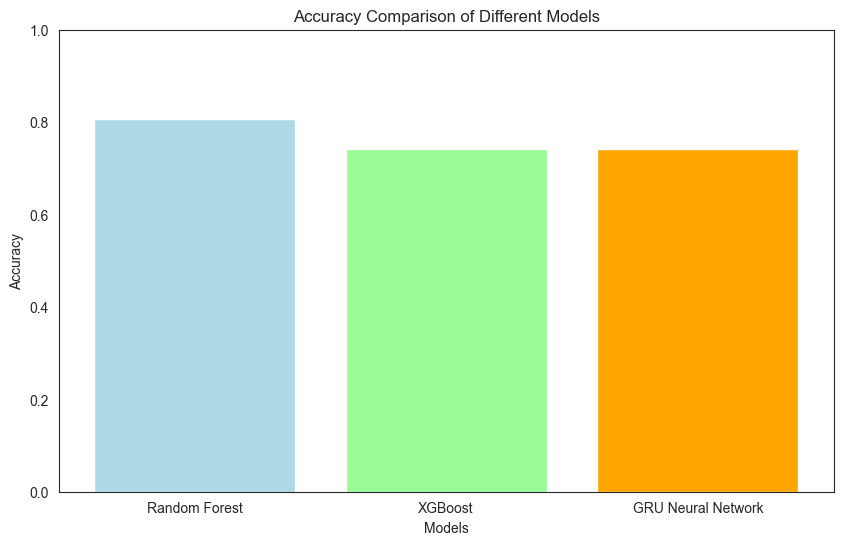

In [35]:
import matplotlib.pyplot as plt

# Define accuracies from the different models (these are placeholders for demonstration)
# Replace these values with actual accuracy scores from your trained models
model_names = ['Random Forest', 'XGBoost', 'GRU Neural Network']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred), accuracy_score(y_test, gru_pred)]

# Create a bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['lightblue', 'palegreen', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for percentage scale
plt.show()


### Saving Model

In [36]:
import pickle as pk
pk.dump(rf_model, open("rf_model.pkl", "wb"))
pk.dump(xgb_model, open("xgb_model.pkl", "wb"))
pk.dump(scaler, open("scaler.pkl", "wb"))